In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [2]:
# Paths to training and validation datasets
train_dataset_path = r'F:\ABDUL\ABDUL 2024\HUMAN_ACTIVITY_RESNET\extracted_files\Train'
val_dataset_path = r'F:\ABDUL\ABDUL 2024\HUMAN_ACTIVITY_RESNET\extracted_files\Test'

In [3]:
# Define categories (same order as used during training)
categories = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'NormalVideos',
              'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']

In [4]:
# Data augmentation and rescaling for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the data order for evaluation
)

# Function to build the ResNet model
def build_resnet_model(input_shape=(64, 64, 3), num_classes=14):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Fine-tune all layers in ResNet50 (you can change this to freeze layers if needed)
    for layer in base_model.layers:
        layer.trainable = True
    
    return model

# # Build and compile the model
# resnet_model = build_resnet_model()
# resnet_model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = resnet_model.fit(
#     train_generator,
#     epochs=2,
#     validation_data=val_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     validation_steps=val_generator.samples // val_generator.batch_size
# )


Found 1266345 images belonging to 14 classes.


In [ ]:
# Save the trained model
resnet_model.save('resnet_model.h5')

In [ ]:
# Load the saved model
model = load_model('resnet_model.h5')

# Function to preprocess a single image
def preprocess_image(image_path, target_size=(64, 64)):
    img = load_img(image_path, target_size=target_size)  # Load and resize the image
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to make a prediction
def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_category = categories[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index]
    return predicted_category, confidence_score

# Get true labels and predicted labels for the entire validation set
true_labels = []
predicted_labels = []

# Predict for the entire validation set
for i in range(val_generator.samples // val_generator.batch_size):
    images, labels = next(val_generator)
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels (one-hot -> index)
    
    # Get predictions for the batch
    batch_predictions = model.predict(images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)
    predicted_labels.extend(batch_predicted_labels)

# Print classification report
report = classification_report(true_labels, predicted_labels, target_names=categories)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1

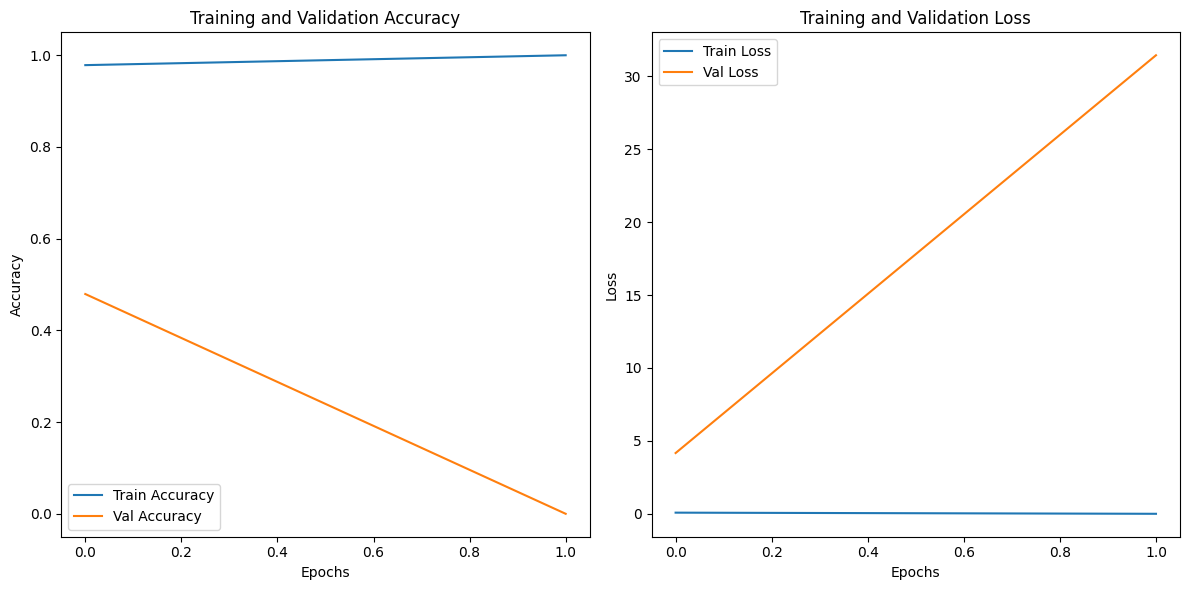

In [11]:
# Plotting training and validation accuracy and loss
# Accuracy plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Load the saved model
model = load_model('resnet_model.h5')

# Function to preprocess a single image
def preprocess_image(image_path, target_size=(64, 64)):
    img = load_img(image_path, target_size=target_size)  # Load and resize the image
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to make a prediction
def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_category = categories[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index]
    return predicted_category, confidence_score

# Get true labels and predicted labels for the entire training set
true_labels = []
predicted_labels = []

# Predict for the entire training set
for i in range(train_generator.samples // train_generator.batch_size):
    images, labels = next(train_generator)
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels (one-hot -> index)
    
    # Get predictions for the batch
    batch_predictions = model.predict(images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)
    predicted_labels.extend(batch_predicted_labels)

# Print classification report for training data
report = classification_report(true_labels, predicted_labels, target_names=categories)
print(report)
